In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt

In [22]:
dataPath = "datasets/housing"
dataFileName = "housing.csv"

In [23]:
def loadData(dataPath,dataFileName):
    fullPath = os.path.join(dataPath,dataFileName)
    return pd.read_csv(fullPath)

housing = loadData(dataPath,dataFileName)

# Analyze Entire Dataset

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

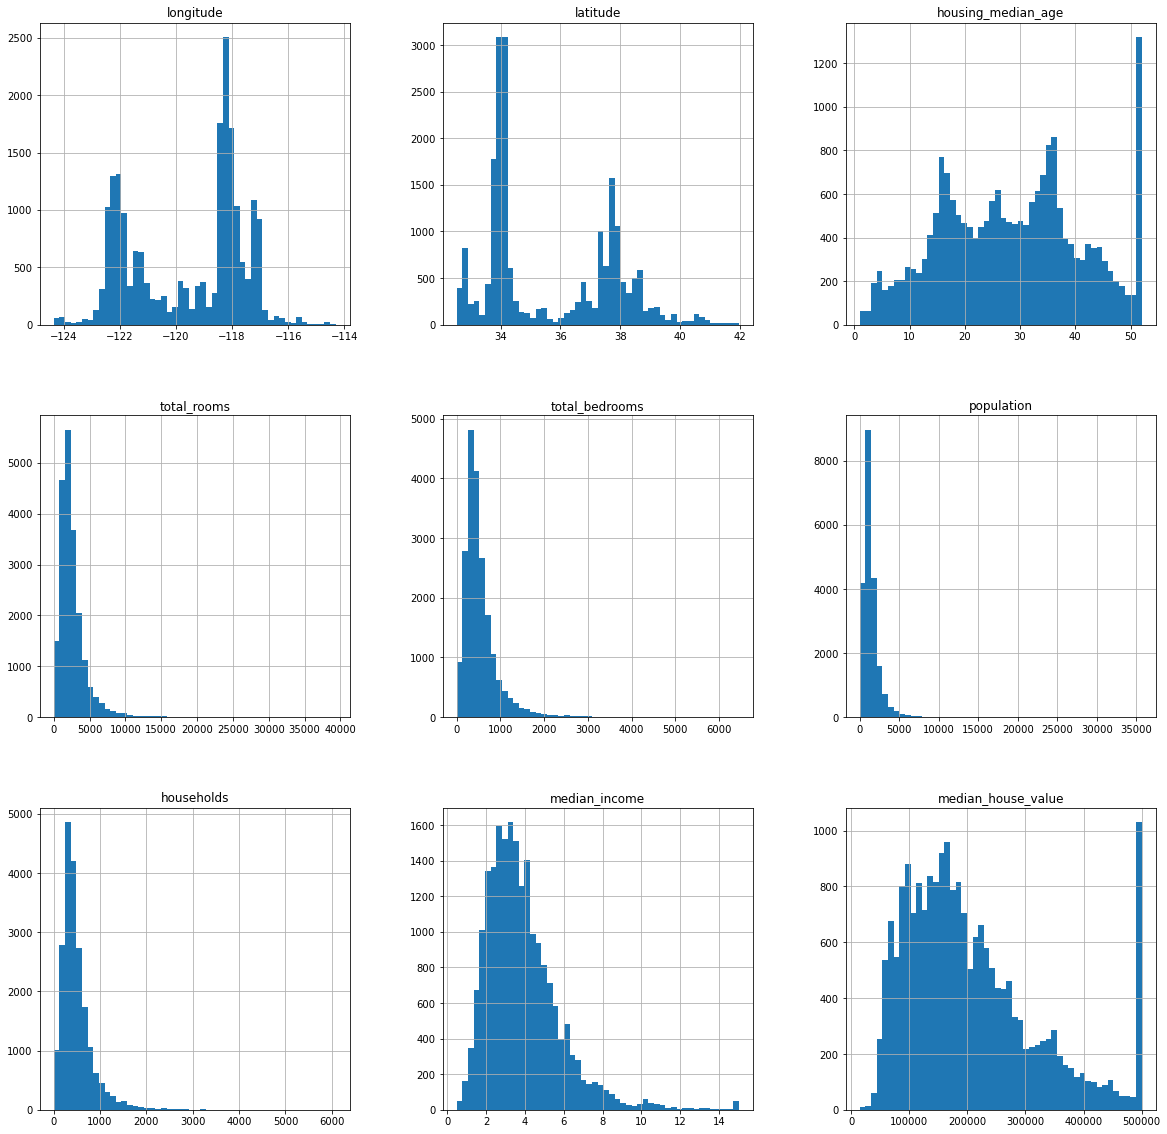

In [28]:
housing.hist(bins = 50,figsize = (20,20))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

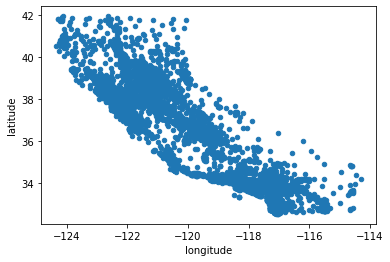

In [29]:
housing.plot(kind = "scatter", x = "longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

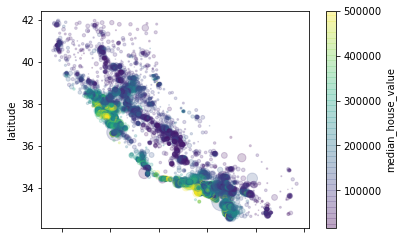

In [34]:
housing.plot(kind = "scatter", x = "longitude",y="latitude",s=housing["population"]/100,c = "median_house_value",colormap='viridis',alpha = 0.2)

In [39]:
dataCorr = housing.corr()
dataCorr["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Split Data

# 1. Randomized method

### Split Based on Random Shuffling

In [9]:
def RandomShuffleSplit(data,trainRatio):
    shuffleIdx = np.random.permutation(len(data))
    trainSize = int(len(data)*trainRatio)
    trainIdx = shuffleIdx[:trainSize]
    testIdx = shuffleIdx[trainSize:]
    return data.iloc[trainIdx],data.iloc[testIdx]

(trainData,testData) = RandomShuffleSplit(housing,0.8)

In [10]:
trainData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3275,-122.92,39.05,38.0,3131.0,624.0,1591.0,568.0,2.5457,80700.0,INLAND
763,-122.08,37.66,37.0,1997.0,436.0,1349.0,437.0,2.1382,166600.0,NEAR BAY
13256,-117.65,34.12,27.0,2298.0,340.0,1071.0,369.0,6.5587,239000.0,INLAND
12153,-117.25,33.70,10.0,5156.0,941.0,2294.0,747.0,3.5800,113400.0,<1H OCEAN
11119,-117.85,33.85,17.0,4678.0,1065.0,2427.0,1020.0,4.2276,254100.0,<1H OCEAN


In [11]:
trainData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16342.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575317,35.642120,28.640141,2628.296330,536.362807,1420.421996,497.999213,3.864939,206638.316013
std,2.004682,2.137368,12.631055,2176.296035,420.159386,1124.775803,380.993466,1.899244,115475.846340
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1445.750000,295.000000,782.000000,278.000000,2.559725,118800.000000
50%,-118.510000,34.260000,29.000000,2120.000000,434.000000,1163.000000,408.000000,3.525000,179800.000000
75%,-118.010000,37.720000,37.000000,3123.000000,644.000000,1719.000000,602.000000,4.740575,265200.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


### Split Using Scikit Learn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
(trainData,testData) = train_test_split(housing,train_size = 0.8,random_state = 42)

In [14]:
trainData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [15]:
trainData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Compare data distribution in Entire Dataset & trainData

In [16]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5,inplace = True)
Tot = housing['income_cat'].value_counts()/len(housing)
Tot.rename("Overall")

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: Overall, dtype: float64

In [17]:
(RStrainData,RStestData) = RandomShuffleSplit(housing,0.8)
(SKtrainData,SKtestData) = train_test_split(housing,train_size = 0.8,random_state = 42)

In [18]:
RS = RStrainData['income_cat'].value_counts()/len(RStrainData)
RS.rename("Random Shuffle")

3.0    0.350170
2.0    0.318253
4.0    0.178416
5.0    0.113493
1.0    0.039668
Name: Random Shuffle, dtype: float64

In [19]:
SK = SKtrainData['income_cat'].value_counts()/len(SKtrainData)
SK.rename("SKLearn TrainTestSplit")

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: SKLearn TrainTestSplit, dtype: float64

# 2. stratified shuffle split to avoid bias

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits = 1,train_size = 0.8,random_state = 42)
for trainIdx,testIdx in split.split(housing,housing['income_cat']):
    SStrainData = housing.loc[trainIdx]
    SStestData = housing.loc[testIdx]

In [22]:
SS = SStrainData['income_cat'].value_counts()/len(SStrainData) # The distribution will be as close as to original
SS.rename("Stratified Shuffle")

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: Stratified Shuffle, dtype: float64

In [23]:
data = {"Overall":Tot,"RandomShuffle":RS,"Sklearn":SK,"StratifiedShuffle":SS}
df = pd.concat(data,axis = 1)
df["RandomShuffle % error"] = ((df["Overall"]-df["RandomShuffle"]) / df["RandomShuffle"])*100
df["Sklearn % error"] = ((df["Overall"]-df["Sklearn"]) / df["Sklearn"])*100
df["StratifiedShuffle % error"] = ((df["Overall"]-df["StratifiedShuffle"]) / df["StratifiedShuffle"])*100
df.index.rename("Income Category",inplace = True)
df.sort_index(inplace = True)
df

,Overall,RandomShuffle,Sklearn,StratifiedShuffle,RandomShuffle % error,Sklearn % error,StratifiedShuffle % error
Income Category,,,,,,,
1.0,0.039826,0.039668,0.039729,0.039850,0.396947,0.243902,-0.060790
2.0,0.318847,0.318253,0.317466,0.318859,0.186489,0.434948,-0.003799
3.0,0.350581,0.350170,0.348595,0.350594,0.117606,0.569840,-0.003455
4.0,0.176308,0.178416,0.178537,0.176296,-1.181263,-1.248304,0.006870
5.0,0.114438,0.113493,0.115673,0.114402,0.832444,-1.068063,0.031763
